## Content
- Recap
- Coding gradient descent
- Computing gradients of function
- Optimization problem
- Constrained optimization problem
  - How to convert constraint optimization problem into unconstraint optimization problem
  - Generalizing constraint optimization problem
  - Example of solving a constraint optimzation problem
  - Solving the original constraint optimization problem
    - computing gradient of loss function with respect to w vector
    - computing gradient of loss function with respect to w0
- Summary

![](https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/049/893/original/Screenshot_2023-09-21_at_12.20.16_PM.png?1695279029)

## Recap

![](https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/049/904/original/Screenshot_2023-09-21_at_12.44.24_PM.png?1695280480)

![](https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/049/905/original/Screenshot_2023-09-21_at_12.45.09_PM.png?1695280530)

## Coding gradient descent

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

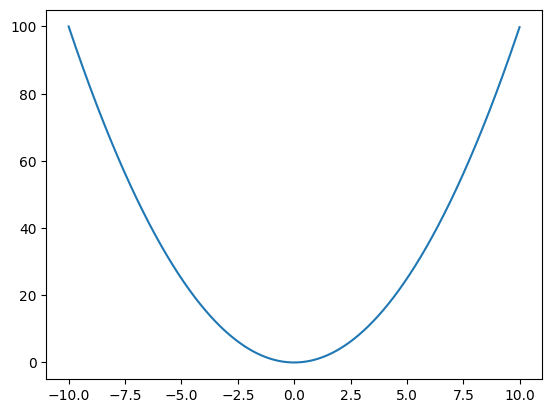

In [ ]:
def f(x):
  ## Try changing this
  return x**2

## Plot f(x)
x = np.arange(-10, 10, 0.01)
y = f(x)

plt.figure()
plt.plot(x, y)
plt.show()

In [ ]:
# This function takes derivative of f at point x
def derivative(x, f):
  delta = 0.0001
  return (f(x + delta) - f(x)) / delta

# This function does exactly one update to my parameter x
def one_step_gd(x, f, lr): # lr -> learning rate, same as \eta
  grad = derivative(x, f)
  new_x = x - lr * grad
  new_fx = f(new_x)
  return new_x, new_fx, grad

In [ ]:
## Define the initial random guess
x0 = -5
num_steps = 0 # Same as t in the update equation

# Let us save all our steps.
xs = []
fxs = []
grads = []

-4.000010000003158


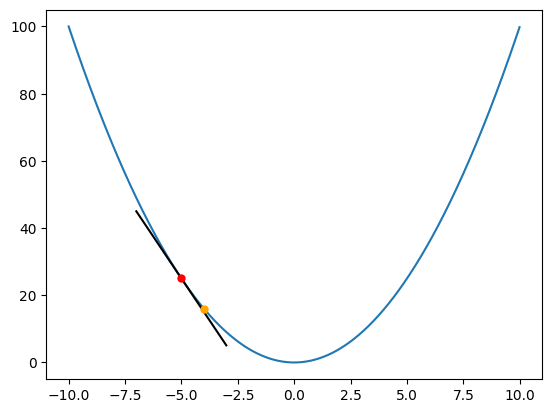

In [ ]:
## Lets plot!!
plt.figure()

# First, plot the function
x = np.arange(-10, 10, 0.01)
y = f(x)
plt.plot(x, y)

# Now apply gradient descent
new_x, new_fx, grad = one_step_gd(x0, f, 0.1)
xs.append(new_x)
fxs.append(new_fx)
grads.append(grad)
num_steps += 1

# Next, plot the old guess and the gradient at that point
t_c = f(x0) - grads[-1] * x0
delta = 2.
t_x = np.arange(x0 - delta, x0 + delta, 0.01)
t_y = grads[-1] * t_x + t_c
plt.plot(t_x, t_y, color="black")

# Next, plot the other guesses
for i in range(num_steps-1):
  plt.plot(xs[i], fxs[i], marker="o", markersize=5, markeredgecolor="green", markerfacecolor="green")

plt.plot(x0, f(x0), marker="o", markersize=5, markeredgecolor="red", markerfacecolor="red")
plt.plot(xs[-1], fxs[-1], marker="o", markersize=5, markeredgecolor="orange", markerfacecolor="orange")

print(new_x)
x0 = new_x
plt.show()

in the above plot the green points are the older points, red is the current point and orange is the next point

## Computing gradients of function

Q1. for the function $f(x)=a_1x_1+a_2x_2+a_3x_3$ and we can represent this function in terms of vector notation as $f(\bar{x})=\bar{a}^T\bar{x}$ now find the $\nabla_\bar{x}f(\bar{x})$

- $\nabla_\bar{x}f(\bar{x})$= $[\frac{\partial }{\partial x_1}f(\bar{x}), \frac{\partial }{\partial x_2}f(\bar{x}), \frac{\partial }{\partial x_3}f(\bar{x})]^T$
- $\nabla_\bar{x}f(\bar{x})= [a_1, a_2,a_3]^T= \bar{a}$

The general rule is as follows
- if we have a function with inputs as we saw above then the gradient of that function with respect to the input variables would be
- $\nabla_{\bar{x}} \bar{a}.\bar{x}$=$\bar{a}$
- which means when taking gradient of the function with respect to $\bar{x}$ we are left with a vector ie $\bar{a}$

![](https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/049/925/original/Screenshot_2023-09-21_at_1.14.55_PM.png?1695282311)

Q2. Let say we have a function $f(x_1,x_1,...,x_d)=x^Tx$ here the function accepts a vector of size d dimensions
- When we are performing $x^Tx$ it is nothing but multiplying each component of the vector with itself so essentially we'll have something as $x_1^2,x_2^2,...,x_d^2$
- we can re-write this as $\sum_{i=1}^dx_i.x_i=\sum_{i=1}^dx_i^2 $
- What will be the gradient of this function?
  - $\nabla_{\bar{x}}f(\bar{x})=[\frac{\partial}{\partial x_1}f(x_1,x_2,...,x_d), \frac{\partial}{\partial x_2}f(x_1,x_2,...,x_d),...,\frac{\partial}{\partial x_d}f(x_1,x_2,...,x_d)]^t$
  - $\nabla_{\bar{x}}f(\bar{x})$=$[2x_1,2x_2,...,2x_d]^T$
  - in vectror form after taking the 2 outsie it'll be $\nabla_{\bar{x}}f(\bar{x})$=$2\bar{x}$

![](https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/049/936/original/Screenshot_2023-09-21_at_1.45.47_PM.png?1695284160)

We can see that how gradients are derivatives are very similar if we find $\frac{d}{dx}x^2=2x$ we are also getting the same thing with gradients but since we are working with multiple variables of a function we denote x as a vector

## Optimization problem

let's go back to the original problem that we had which is we wanted to segerate red points from the green points by finding the best possible lines to seperate them
- We had our gain function which takes our dataset D and parameters $\bar{w}$ and $w_0$ where we wanted to maximize the parameters
  - $G(D,\bar{w},w_0)=\sum_{i=1}^n(\frac{\bar{w}^T\bar{x}+w_o}{\left||w\right||})$
  - Where D is the dataset $D=\{(x_i,y_i)\}_{i=1}^n$
  - The optimization problem is $max_{\bar{w},w_0}G(D,\bar{w},w_0)$
- or in terms of loss function we want to find value of the parameters that minimises our loss function
  - ie $min_{\bar{w},w_0}L(D,\bar{w},w_0)$
  - where $L(D,\bar{w},w_0)=-G(D,\bar{w},w_0)$


![](https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/049/945/original/Screenshot_2023-09-21_at_2.08.24_PM.png?1695285523)

So this is the problem that we want to solve using the method of gradient descent that we studies in the last class
- $min_{\bar{w},w_0}L(D,\bar{w},w_0)$
- $min_{\bar{w},w_0}-\sum(\frac{\bar{w}^T\bar{x}+w_0}{\left||w\right||})$

Now when we open up $\left||w\right||$ in the denominator it'll be $\sqrt{w_1^2.w_2^2,..,w_d^2}$ now taking a derivative of something that is in denominator that to under sqrt it'll create a lot of troubles
- Thus it is very difficult to calculate the Gradient/derivative of this loss function because of denominator.

Q. Do you agree when we are computing the gradients the only that we really care about is the direction of that gradient?
- Yes

Q. If we have a vector let say $[x_1,x_2,x_3]$ then if we only what the direction of this vector how can we get that?
- Using the unit vector, because it is that vector that is going in the same direction of the vector but the magnitude of this vector is 1

So the equation that we saw which is very hard to solve is called as a **unconstrainted optimization problem** and we'll convert this problem into a **constraint optimization problem** by adding a constraint that the $\left||w\right||$ should be equal to 1 ie $\left||w\right||=1$


![](https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/049/965/original/Screenshot_2023-09-21_at_3.23.56_PM.png?1695290052)

Let's understand the same thing geometrically

Let say we have a function $f(x)=x^2-3x+3$
> Use desmos to demonstarte the function: [link](https://www.desmos.com/calculator/avdkczdr9s)

- For the function do you see that the minimum value of this functions 0.75 and the value of x at which this minimum value occurs is 1.5
- Now let's add a constraint which is the minima points should satisfy the equation $f(x)=2x^2-3x+1$
- So instead of just focussing on the minima of the original function we'll also keep the constraint in mind and find the value that will also satify the constraint that we have
- We can see that we have only 2 points of intersection
- And based on this we can say that the loss function is minimum at the value of x=1.414 accoriding to the constraint
- This is done so as to minimze the area in which we look for the minimum value of the original function, as per the constraint only 2 points satifies the constraint out of which one point give us the point where the function is minimum

![](https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/049/968/original/Screenshot_2023-09-21_at_3.43.38_PM.png?1695291235)

## Constrained optimization problem

To convert it into a constrainted optimization problem we write **st** which means **such that** or also referred to as **subject to**

![](https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/050/008/original/Screenshot_2023-09-21_at_5.57.23_PM.png?1695299266)

### How to convert constraint optimization problem into unconstraint optimization problem

Now after having the constrainted problem how do we solve the problem?
- we go from a constained optimization problem to a unconstrainted optimization using **Lagrange multiplier**
- Let say we have a constraint optimization function
  - $min_{\bar{x}}f(\bar{x})$
    - $s.t g(\bar{x})=0 $

After converting it into an unconstraint optimiation problem using lagrange multipler method the function is
- $min_{\bar{x}}f(\bar{x})+\lambda g(\bar{x})$
- We simply add the contraint to our function by multiplying it with a variable $\lambda$


![](https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/050/026/original/Screenshot_2023-09-21_at_6.57.46_PM.png?1695302881)

### Generalizing costraint optimzation problem

if we have a function with n number of constraint then to convert it into an unconstraint optimzation problem we simply add them to our function and multiply them with $\lambda$

![](https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/050/028/original/Screenshot_2023-09-21_at_7.04.14_PM.png?1695303277)

### Example of solving a contraint optimization problem

Q. Find minima of $f(x)=x^2-3x-3$ s.t $-x^2+2x+3=0$

![](https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/050/031/original/Screenshot_2023-09-21_at_7.56.28_PM.png?1695306463)

Step1: Using lagrange multipler method we'll convert the constraint problem into an unconstraint problem

![](https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/050/032/original/Screenshot_2023-09-21_at_7.59.43_PM.png?1695306598)

Q. How many variables are there in the new unconstraint equation?
- there are 2 variables, one is x and other is y
- so we can say that we have a new function $h(x,\lambda)$ which takes 2 input and in vector representation we can represent it as $\bar{w}=[x,\lambda]^T$
- Thus now we want to minimize this new function $h(x,\lambda)$ notice how we are taking the constraint into consideration while minimizing the function

![](https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/050/049/original/Screenshot_2023-09-21_at_9.41.28_PM.png?1695312703)

Q. When we want to minimize any function what do we do?
- We compute the gradient of that function
- Thus to minimize this new function we'll find the gradient of this function
  - thus we'll find partial derivative of the function first with respect to x and then with respect to $\lambda$

Q. What is the derivative/gradient of the function when we reach the minimum point?
- It is 0
- Thus to determine the points $x$ and $\lambda$ where the function is minimum we equate the gradient to 0 and solve for the system of equation as we have 2 unkowns and 2 equations

![](https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/050/050/original/Screenshot_2023-09-21_at_9.46.31_PM.png?1695313011)

![](https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/050/051/original/Screenshot_2023-09-21_at_9.48.15_PM.png?1695313125)

![](https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/050/052/original/Screenshot_2023-09-21_at_9.50.13_PM.png?1695313230)

![](https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/050/053/original/Screenshot_2023-09-21_at_9.51.33_PM.png?1695313309)

Thus the value at which the function is minimum is at x=3 and the value of the function when it is minimum is -3

So now using the lagrange multiper to solve our problem of constraint equation
- below is the equation that you'll get once you convert contraint optimzation problem to unconstraint problem using lagrange multipler

![](https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/050/054/original/Screenshot_2023-09-21_at_9.57.49_PM.png?1695313688)

### Solving the original contraint optimization problem

So now as we saw we'll compute the gradient of this new function and we'll use gradient descent to find the best values of $\bar{w}$ and $w_0$ using the gradient descent rule

![](https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/050/055/original/Screenshot_2023-09-21_at_10.06.21_PM.png?1695314195)

#### Computing gradient of loss function with respect to w vector

Let's see how to compute this gradient
- here let's seperate each part first part is underlined using red colour, 2nd using green and 3rd using purple colour
- So first lets take the partial derivative wirth respect to $\bar{w}$
  - Notice that the partial derivative of the purple part ie of $-\lambda$ will be 0 as there is no $w$

![](https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/050/056/original/Screenshot_2023-09-21_at_10.12.51_PM.png?1695314589)

Now lets see how to compute partial derivative of $\lambda \sqrt{\bar{w}^T\bar{w}}$
- Lets $f(x)=\sqrt{x}$ and let $h(x)=f(\bar{w}^T\bar{w})$
- Using chain rule we can write $f(h(x))$

![](https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/050/057/original/Screenshot_2023-09-21_at_10.15.33_PM.png?1695314749)

Putting everything together we got what is the gradient of the function with respect to $\bar{w}$

![](https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/050/058/original/Screenshot_2023-09-21_at_10.26.33_PM.png?1695315409)

#### Computing gradient of loss function with respect to w0

Now we also need to update our $w_0$

Q. Would we compute the gradient or partial derivaitve of our loss function?
- we'll compute the partial derivative because $w_0$ is a single variable.

![](https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/050/062/original/Screenshot_2023-09-21_at_10.52.03_PM.png?1695316942)

## Summary


![](https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/050/067/original/Screenshot_2023-09-21_at_10.54.53_PM.png?1695317111)

![](https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/050/068/original/Screenshot_2023-09-21_at_10.55.38_PM.png?1695317154)